In [1]:
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('/app')
from evaluation.ijb_evals import plot_dir_far_cmc_scores, plot_tar_far_scores

In [13]:
def draw_score_distr_plot(
    scores_distr, score_type, model_name, in_data_name, out_data_name
):
    sns.set_theme()
    plt.figure(figsize=(12, 8))
    sns.distplot(
        scores_distr[in_data_name],
        kde=True,
        norm_hist=True,
        hist=True,
        label=in_data_name,
    )
    sns.distplot(
        scores_distr[out_data_name],
        kde=True,
        norm_hist=True,
        hist=True,
        label=out_data_name,
    )

    plt.title(
        f"Распределение косинусной схожести для совпадающих и несовпадающих пар изображений"
    )
    plt.xlabel(f"Косинусная схожесть")

    plt.legend()

In [3]:
a = np.load('/app/outputs/ijb_evals/ijb_evals_2023-06-01_15-58-06/IJBC_CosineSim_det_and_scf_score.npz')

In [4]:
true_match_scores = a['scores'][0,:][a['label']==1]
wrong_match_scores = a['scores'][0,:][a['label']==0]

### TAR@FAR кривая

In [5]:
fars_cal = [10 ** ii for ii in np.arange(-4, 0, 4 / 100)] + [1]
threshes, recalls = [], []
wrong_match_scores_sorted = np.sort(wrong_match_scores)[::-1]
for far in fars_cal:
    thresh = wrong_match_scores_sorted[max(int((wrong_match_scores_sorted.shape[0]) * far) - 1, 0)]
    recall = (
            np.sum(true_match_scores > thresh)
            / true_match_scores.shape[0]
        )
    threshes.append(thresh)
    recalls.append(recall)

/tmp/ipykernel_34889/292318331.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


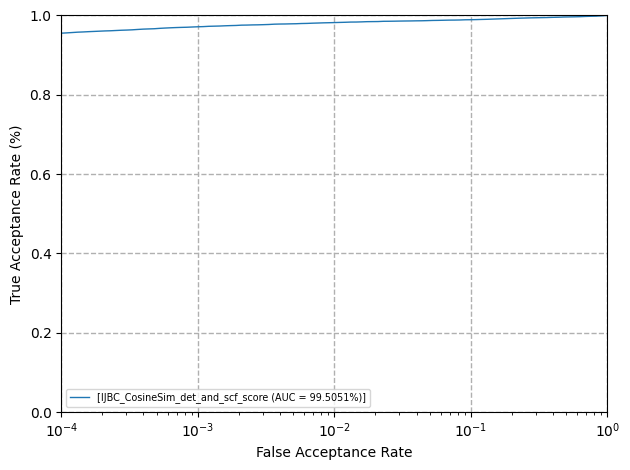

In [13]:
method_names = a['names']
method_scores = [[fars_cal, recalls]]
fig = plot_tar_far_scores(scores=method_scores, names=method_names)
fig.show()

In [12]:
id

1

In [11]:
method_names

array(['IJBC_CosineSim_det_and_scf_score'], dtype='<U32')

In [9]:
for id, score in enumerate(method_scores):
    name = None if method_names is None else method_names[id]
    if isinstance(score, str) and score.endswith(".npz"):
        aa = np.load(score)
        score, name = aa.get("scores")[0], aa.get("names")[0]
    

IndexError: index 1 is out of bounds for axis 0 with size 1

In [10]:
score

[[0.9554123843125224,
  0.9561793731144859,
  0.9570486270900445,
  0.9579690136524007,
  0.9585314721071739,
  0.9592473283223398,
  0.9598609193639106,
  0.9604745104054814,
  0.9610881014470523,
  0.9614971621414328,
  0.9621618857698011,
  0.9628266093981694,
  0.9632868026793475,
  0.9639003937209183,
  0.9648207802832746,
  0.9656389016720356,
  0.9661502275400112,
  0.9666104208211893,
  0.9675819399703431,
  0.9683489287723066,
  0.9690136524006749,
  0.9695761108554481,
  0.9700363041366262,
  0.9703942322442093,
  0.9710078232857801,
  0.9715702817405533,
  0.9719793424349338,
  0.9727463312368972,
  0.9731042593444802,
  0.9734621874520633,
  0.974075778493634,
  0.9745359717748121,
  0.974893899882395,
  0.9756608886843585,
  0.9758654190315488,
  0.9762744797259293,
  0.9764790100731195,
  0.9768880707675002,
  0.9773482640486783,
  0.9781152528506417,
  0.9784731809582247,
  0.9786265787186174,
  0.9789845068262003,
  0.9792401697601881,
  0.9798026282149614,
  0.98005829

/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


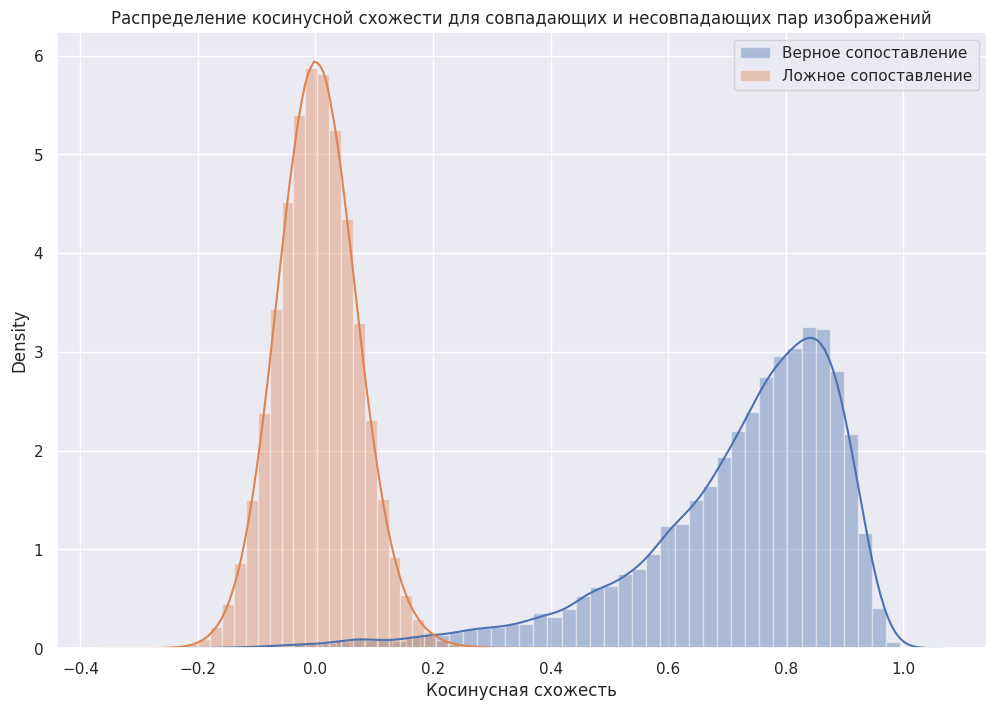

In [15]:
scores_distr = {
        "Верное сопоставление": true_match_scores,
        "Ложное сопоставление": wrong_match_scores,
    }

draw_score_distr_plot(
    scores_distr=scores_distr,
    score_type="EVM",
    model_name="EVM",
    in_data_name="Верное сопоставление",
    out_data_name="Ложное сопоставление",
)